# Visualización de objetos asociados a tratamientos de radioterapia
------

## Estudio de CT

Los datos anatómicos para la *simulación* del tratamiento del paciente se adquieren mediante un estudio de tomografía computerizada *CT* con el paciente inmobilizaddo en una postura que sea reproducible a lo largo del tratamiento.

In [1]:
%cd ..

/home/radiofisica/Shares/Radiofisica/csr/rtviewer


In [2]:
from skrt import Image

In [3]:
im = Image('patients/TestMamaDer001/20230116_095704/CT/20230116_095704')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Times New Roman


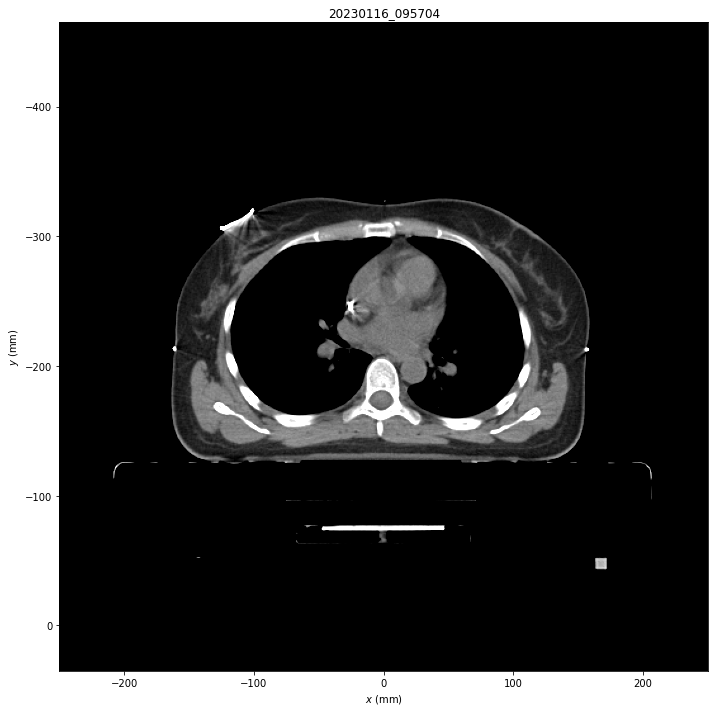

In [4]:
im.plot('x-y', idx = 30, figsize=10) 
# Cambiar el valor de idx para cambiar el plano visualizado
# Selcción de orientación de los planos  
## 'x-y' Axial
## 'x-z' Coronal
## 'y-z' Sagital  

## Estructuras

Los volumenes relevantes para la planificación, sean bien objetivos o bien regiones de interés, se tienen que delimitar sobre el estudio CT de simulación.

Las imágenes se tienen que segmentar mediante procesos manuales o semiautomáticos. Estos últimos utilizan procedimientos de base de conocimiento que se ha tenido que establecer mediante procesos manuales.

In [5]:
from skrt import StructureSet

In [6]:
ss = StructureSet('patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm')

Los conjuntos de estructuras se visualizan asociándolos a la imagen a partir de la quee han sido generados

In [7]:
im.add_structure_set(ss)

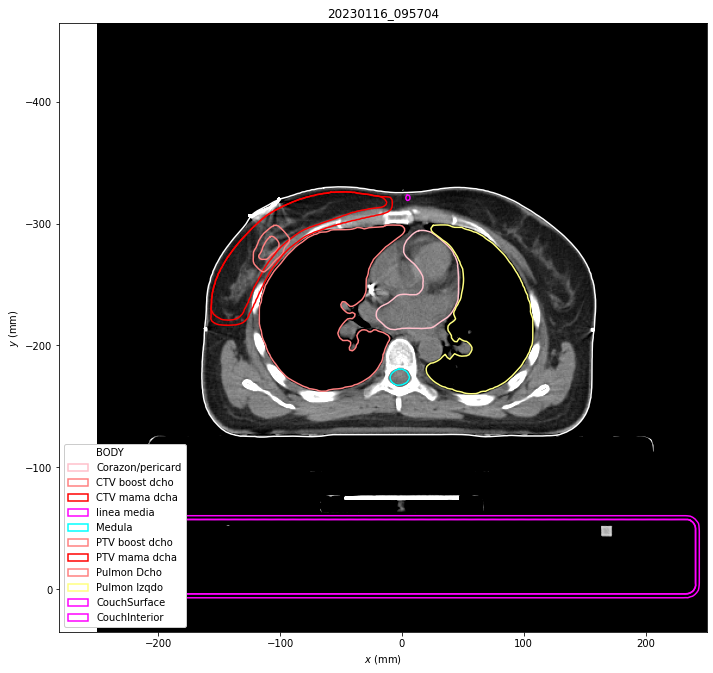

In [8]:
im.plot(idx=30, figsize=10, rois='all', legend=True)

In [9]:
from skrt import Patient

In [73]:
pat = Patient('patients/TestMamaDer001')

In [74]:
pat.studies[0]


Study
{
  ct_doses: [7 * <class 'skrt.dose.Dose'>] 
  ct_images: [1 * <class 'skrt.image.Image'>] 
  ct_plans: [4 * <class 'skrt.dose.Plan'>] 
  ct_structure_sets: [2 * <class 'skrt.structures.StructureSet'>] 
  date: '20230116' 
  dose_types: {1 * keys of type <class 'str'>} 
  files: [4 * <class 'skrt.core.File'>] 
  image_types: {1 * keys of type <class 'str'>} 
  path: '/home/radiofisica/Shares/Radiofisica/csr/rtviewer/patients/TestMamaDer001/20230116_095704' 
  patient: <class 'skrt.patient.Patient'> 
  plan_types: {1 * keys of type <class 'str'>} 
  print_depth: 0 
  structure_set_types: {1 * keys of type <class 'str'>} 
  subdir: '' 
  time: '095704' 
  timestamp: '20230116_095704' 
}

In [75]:
stdy = pat.studies[0]

In [76]:
stdy.ct_structure_sets[0]


StructureSet
{
  alpha_beta_ratios: {} 
  colors: None 
  date: '20230116' 
  dicom_dataset: None 
  files: [] 
  ignore_dicom_colors: False 
  image: <class 'skrt.image.Image'> 
  keep_renamed_only: False 
  loaded: False 
  multi_label: False 
  name: 'rs.1.2.246.352.205.5566667512400723974.375329800850442140.dcm' 
  names: None 
  path: '/home/radiofisica/Shares/Radiofisica/csr/rtviewer/patients/TestMamaDer001/20230116_095704/RTSTRUCT/CT/20230116_095704/RS.1.2.246.352.205.5566667512400723974.375329800850442140.dcm' 
  patient: <class 'skrt.patient.Patient'> 
  plans: [] 
  print_depth: 0 
  roi_kwargs: {} 
  rois: [] 
  sources: [1 * <class 'str'>] 
  subdir: '' 
  summed_names: [] 
  time: '095704' 
  timestamp: '20230116_095704' 
  to_keep: None 
  to_remove: None 
}

In [77]:
ss0 = stdy.ct_structure_sets[0]

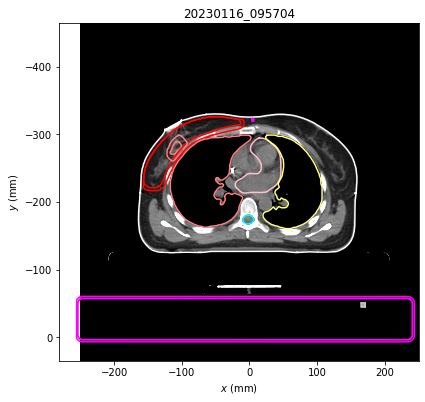

In [78]:
ss0.plot()

In [19]:
from matplotlib import pyplot as plt

In [94]:
stdy.ct_doses[5]


Dose
{
  affine: (4, 4) array 
  ax: <AxesSubplot:title={'center':'dosers.nii'}, xlabel='$x$ (mm)', ylabel='$y$ (mm)'> 
  data: (188, 88, 129) array 
  date: '20230116' 
  default_intensity: None 
  dicom_dataset: None 
  dose_summation_type: None 
  dose_type: None 
  dose_units: None 
  downsampling: None 
  fig: <Figure size 892.262x432 with 1 Axes> 
  files: [] 
  image: <class 'skrt.image.Image'> 
  image_extent: [3 * <class 'tuple'>] 
  image_size: [3 * <class 'numpy.float64'>] 
  lims: [3 * <class 'tuple'>] 
  log_level: 'WARNING' 
  logger: <Logger Dose (WARNING)> 
  max: 1030396.0 
  n_voxels: [3 * <class 'int'>] 
  nifti_array: False 
  origin: [3 * <class 'numpy.float64'>] 
  path: '/home/radiofisica/Shares/Radiofisica/csr/rtviewer/patients/TestMamaDer001/20230116_095704/RTDOSE/CT/20230116_095704/dosers.nii' 
  patient: <class 'skrt.patient.Patient'> 
  plot_extent: {3 * keys of type <class 'str'>} 
  print_depth: 0 
  sinogram: None 
  source: '/home/radiofisica/Shares/Rad

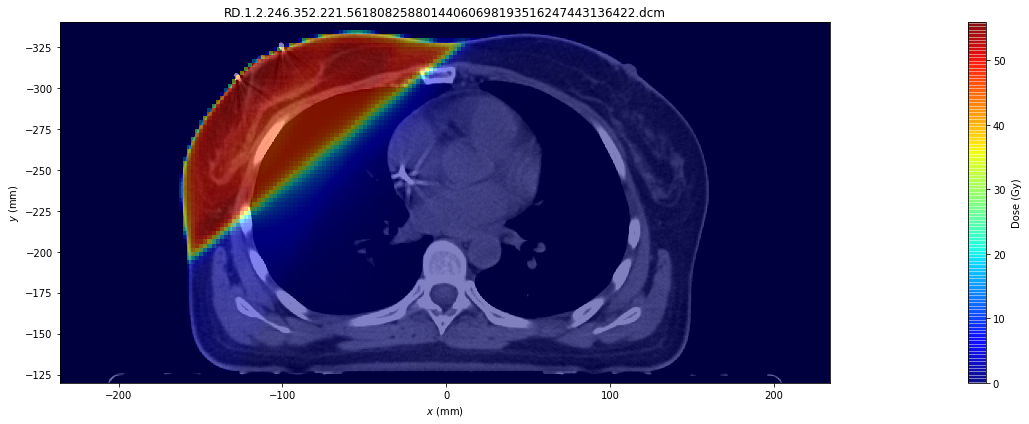

In [118]:
stdy.ct_doses[0].plot(include_image=True, pos=100, colorbar=1)

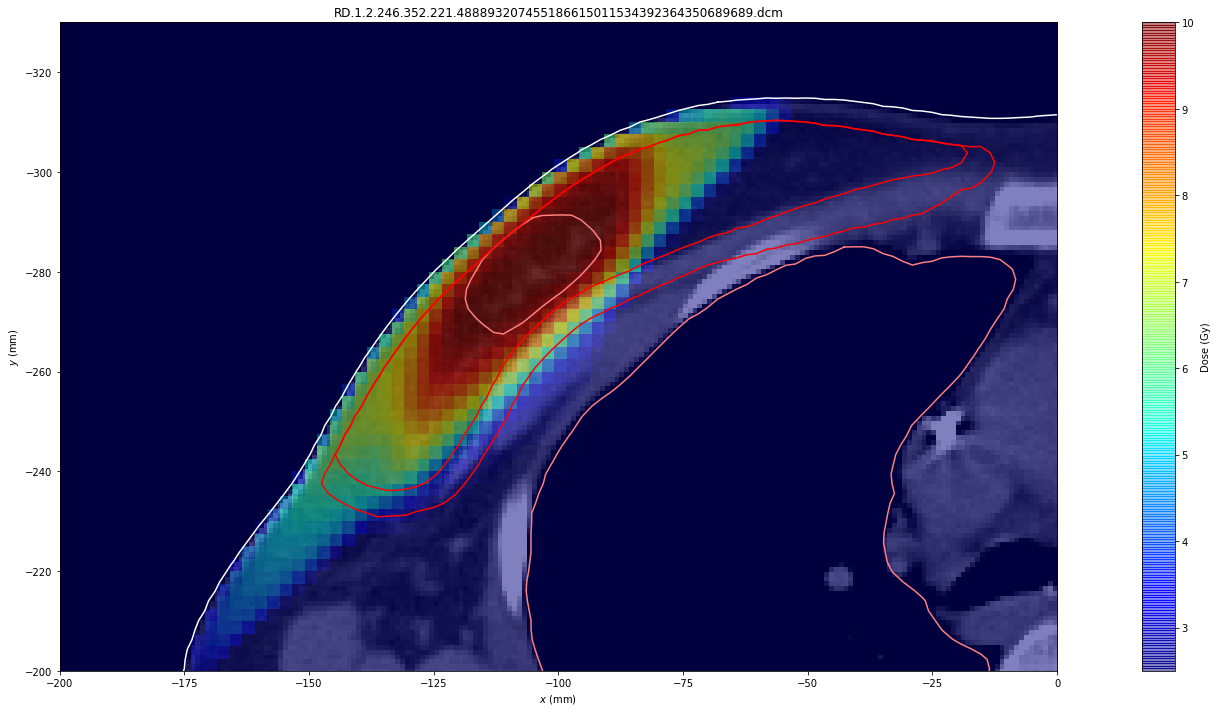

In [151]:
pos=150
fig, ax = plt.subplots(figsize=(20,10))
ss0.plot(ax=ax, show=False, pos=pos)
stdy.ct_doses[2].plot(pos=pos, colorbar=1, ax=ax, intensity=[2.5,10], zoom=1, xlim=[-200,0], ylim=[-200, -330])
plt.show()

In [61]:
dose0.plot?

Signature:
dose0.plot(
    view=None,
    sl=None,
    idx=None,
    pos=None,
    ax=None,
    gs=None,
    figsize=None,
    zoom=None,
    colorbar=False,
    no_xlabel=False,
    no_ylabel=False,
    no_xticks=False,
    no_yticks=False,
    no_xtick_labels=False,
    no_ytick_labels=False,
    include_image=True,
    opacity=None,
    intensity=None,
    mpl_kwargs=None,
    show=True,
    mask=None,
    mask_threshold=0.5,
    masked=True,
    invert_mask=False,
    mask_color='black',
    **kwargs,
)
Docstring:
Plot this overlay, optionally overlaid on its associated Image.

**Parameters**:

view : str
    Orientation in which to compute the index. Can be "x-y", "y-z", or
    "x-z".  If None, the initial view is chosen to match
    the image orienation.

sl : int, default=None
    Slice number to plot. Takes precedence over <idx> and <pos> if not
    None. If all of <sl>, <idx>, and <pos> are None, the central
    slice will be plotted.

idx : int, default=None
    Index of the 

In [69]:
dose0.transform?

Signature:
dose0.transform(
    scale=1,
    translation=[0, 0, 0],
    rotation=[0, 0, 0],
    centre=[0, 0, 0],
    resample='fine',
    restore=True,
    order=1,
    fill_value=None,
)
Docstring:
Apply three-dimensional similarity transform using scikit-image.

The image is first translated, then is scaled and rotated
about the centre coordinates


**Parameters:**

scale : float, default=1
    Scaling factor.

translation : list, default=[0, 0, 0]
    Translation in mm in the [x, y, z] directions.

rotation : float, default=0
    Euler angles in degrees by which to rotate the image.
    Angles are in the order pitch (rotation about x-axis),
    yaw (rotation about y-axis), roll (rotation about z-axis).

centre : list, default=[0, 0, 0]
    Coordinates in mm in [x, y, z] about which to perform rotation
    and scaling of translated image.

resample: float/string, default='coarse'
    Resampling to be performed before image transformation.
    If resample is a float, then the image i